In [2]:
import cv2 
# import pytesseract
# pytesseract.pytesseract.tesseract_cmd = r'C:\Users\USER\AppData\Local\Tesseract-OCR\tesseract.exe'

import easyocr

reader = easyocr.Reader(['ru'], gpu=True)

import numpy as np

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [16]:
import cv2 
import pytesseract

img = cv2.imread('./405/JPG/141899.jpg')

# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

';\nSy nae ermcae pomaaE, nnaamapepesce\n’ Nai 28s abopeoe 0\non Ty, ]\nin r Bee cd 29\nep oera w ,\nOrpercrne Wi Ok. ‘one a.\nwownme Ab LbgOL\nCOruaror 9 manrinn oun nam, sor\n\nTa [en tare | ie | a [Kom [ em | Sa\n\n3 2 rs = nes | wae\nSapearel wml | S50 [052020 | vm ei | coo [oss zHer | race | wos |\nSapa roTe| nin ay | _e00 [26062020 | nwa(Ge) | 600 [ceczz0z2| wwacea | eee |\nee pay e00 | 26702070 | ra Gn) | oon [ozo 2022 | wae | 600\nfarcrzore| rman) | 000 [16.11.2020 ova) SS Soe\nfozr2.20%9| ewntée) | 600 qaeaiet | amaieay | eo [tora | nonce | e07 |\nae ep [aronanar | nnva(oe) | 000 | oneaoce | wate | ee |\n[7.032020] nnva\\ser | 600 75057021] nwa(Ga) | 600 | ¥oeaoas | wait) | 002 _|\n[raoszoz0] vase) | 600 [voor 2nzi | nace) | oo 7057023 | ovate) | _600_\\\nee area) [600 | teme2071 | enaicey | 08 _\\eworaszs| mone} =)\n10.07.2020] nna a) | 600 saa | wate) | 62 aa as\nemer Any tra 2 0727, oncom Hn\n\n2\n24\n'

In [40]:
import numpy as np

img = cv2.imread('./405/JPG/141899.jpg')

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [14]:
import cv2 
import pytesseract

img = cv2.imread('./405/JPG/256578.jpg')

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)

-1

In [2]:
image = cv2.imread("./405/jpg/141899.jpg")
#image = image[:,:,0]
config = '--psm 4 --oem 1'
string = pytesseract.image_to_string(image,lang='rus')

print(string)

Дата

т
215662019 | жд (68) 105582020 | п 68)

[29082019 | плуд(6е) "26062020 | пуд (6)

30092018] ииуд (68) 26102020 | пд а)

От 11.2019 | пп (68) 61112020 [ ауд)

[0292-2019] пм (69), 23032021 | плд(68) | 800

[20.01.2020] пуд (68) 60 [61062521 | пмд(68) | 6% лм 9) |
27032020[ пм (6) 25062021 [пд (68) |600 в) |
13052020] ппу (68) 19072021 | пмд (в) | 8%

052020 [ плул(68) | 1908 ре 160

0.07.2020 | плйд (68) 302621 | плуд(6е) |__60.

стана 2023 тов 072




Вот от сюда начинаетвся easyOCR

In [45]:
image = cv2.imread('C:/Users/darve/Pet_projects/405/141899.jpg')
image = image[int(image.shape[0]/2):,:,:]
gray_image= image[:,:,0]

# (1) thresholding image
ret,thresh_value = cv2.threshold(gray_image,180,255,cv2.THRESH_BINARY_INV)

# (2) dilating image to glue letter with e/a
kernel = np.ones((2,2),np.uint8)    
dilated_value = cv2.dilate(thresh_value,kernel,iterations = 1)

# (3) looking for countours
contours, hierarchy = cv2.findContours(dilated_value,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# (4) extracting coordinates and filtering them empirically 
coordinates = []
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    if h> 50 and w>50 and h*w<350000:  
        coordinates.append((x,y,w,h))

Дальше попытки объединить детекцию ячеек с текстом с помощью **doctr** с распознаванием текста **easyocr**

In [160]:
from doctr.io import DocumentFile
from doctr.models import detection_predictor

model = detection_predictor(pretrained=True)

doc = DocumentFile.from_images('C:/Users/darve/Pet_projects/405/141899.jpg')

result = model(doc)

coordinates = result[0]

In [161]:
def convert_coordinates(coords, image_shape):
    coords = np.copy(coords)
    coords[:, [0, 2]] *= image_shape[1]
    coords[:, [1, 3]] *= image_shape[0]
    
    return coords.astype(int)

coordinates = convert_coordinates(coordinates, image.shape)

In [162]:
def sort_coordinates(coords):
    sorted_indices = np.argsort(coords[:, 0])
    coords = coords[sorted_indices]
    change_indices = np.where(np.diff(coords[:, 0]) != 0)[0] + 1
    subarrays = np.split(coords, change_indices)
    
    for i in range(len(subarrays)):
        subarrays[i] = subarrays[i][np.argsort(subarrays[i][:, 1])]
    coords = np.concatenate(subarrays)
    
    return coords

coordinates = sort_coordinates(coordinates)

In [163]:
# def sort2(val):   #helper for sorting by y
#     return val[1]   

recognized_table = row = []
prev_y = 0
# coordinates.sort() #sort by x
# coordinates.sort(key = sort2) # sort by y
for coord in coordinates:
    x, y, w, h, k = coord
    if y>prev_y+5: #new row if y is changed
        recognized_table.append(row)
        row = [] 
    crop_img = image[y:y+h, x:x+w]
    recognized_string = reader.readtext(
        crop_img,
        batch_size=50,
        detail=0,
        rotation_info=[90,180,270]
        )
    #print(recognized_string)
    row.append(recognized_string)
    prev_y = y
recognized_table

[[...],
 [[], ["'", '!']],
 [['1', '1']],
 [['1', '1']],
 [['!', '1']],
 [['1', '1']],
 [['1', '1']],
 [['!'], ['5', '!', '1']],
 [['1'],
  ['1', '['],
  ['27,03.2020', '8', '070? 90 !', 'Е', '0702 20 0', '2', '5', '1'],
  ['Дята', '@', '8', '1.06 2019', '8']],
 [['2', '8', 'кра', '6102 90 (', '8', '8', '8'], []],
 [['1', '"'],
  ['8',
   '8',
   '03 2020',
   '8',
   '05 2020',
   'в',
   '8',
   '5',
   '8',
   '8',
   '5',
   '8',
   '!',
   '€']],
 [['5 --0', '8', '5', '8', '8', '5', '7 2020', '!', 'е€;']],
 [['8', '8', '8', 'в9) &и', '7 2020', "'", "'", 'е€;'], ['Коп-', '@', '8']],
 [['1', '"'],
  ['8', '6107 (', '8', '8', '2019', '8', '8', '9', '12019'],
  ['@', '2'],
  ['1']],
 [[], ['6', '₽', '"', 'в', '8', '@']],
 [[],
  ["'ПБн-Па",
   '1',
   '8',
   '8',
   '26 08 2020',
   '8',
   '8',
   '26 102020',
   '8',
   'птуд (68)'],
  ['"', 'ПЕм Пъ', '#', 'Е', '8', '8', '26 08 2020', '8']],
 [['{']],
 [["'", '{'],
  ['1', '8', 'Б', '26 08 2020', '8', '8', '26 10.2020', '8', '8', '

А теперь результат работы одного **doctr**. Можно попробовать ещё разные модели, тут дефолтные, как и настройки разделения на ячейки, чтобы даты были в одной всегда.

In [164]:
from doctr.io import DocumentFile
from doctr.models import ocr_predictor

model = ocr_predictor(pretrained=True)

doc = DocumentFile.from_images('C:/Users/darve/Pet_projects/405/141899.jpg')

result = model(doc)

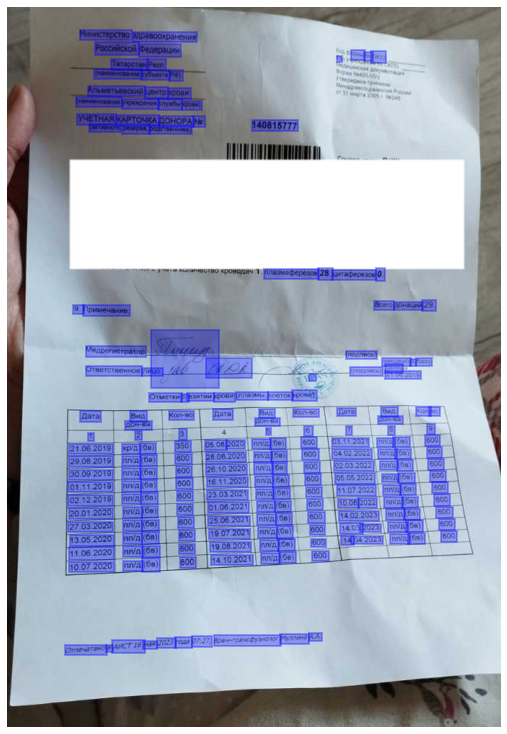

In [165]:
result.show(doc)

Дальше пример одного блока (столбца), из которого одинаково можно тащить нормально распознанные даты, тип крови (в большинстве есть **n**, если это плазма) и факт оплаты (везде ровно два символа в скобках для безвозмездной сдачи). Получается достаточно стабильно.

In [174]:
result.pages[0].blocks[12]

Block(
  (lines): [
    Line(
      (words): [Word(value='Aata', confidence=0.45)]
    ),
    Line(
      (words): [Word(value='1', confidence=1.0)]
    ),
    Line(
      (words): [
        Word(value='21.06:2019', confidence=0.93),
        Word(value='Mp/A', confidence=0.64),
        Word(value='(0e)', confidence=0.39),
      ]
    ),
    Line(
      (words): [
        Word(value='29.06.2019', confidence=0.55),
        Word(value='nnA', confidence=0.7),
        Word(value='(6e)', confidence=0.55),
      ]
    ),
    Line(
      (words): [
        Word(value='30.09.2019', confidence=0.8),
        Word(value='VA', confidence=0.49),
        Word(value='(6a)', confidence=0.87),
      ]
    ),
    Line(
      (words): [
        Word(value='01.11.2019', confidence=0.84),
        Word(value='nn/A', confidence=0.65),
        Word(value='(6e)', confidence=0.76),
      ]
    ),
    Line(
      (words): [
        Word(value='02.12:2019', confidence=1.0),
        Word(value='nnn', confidence=0.5

Более смазанная фотка

In [175]:
doc = DocumentFile.from_images('C:/Users/darve/Pet_projects/405/256578.jpg')

result = model(doc)

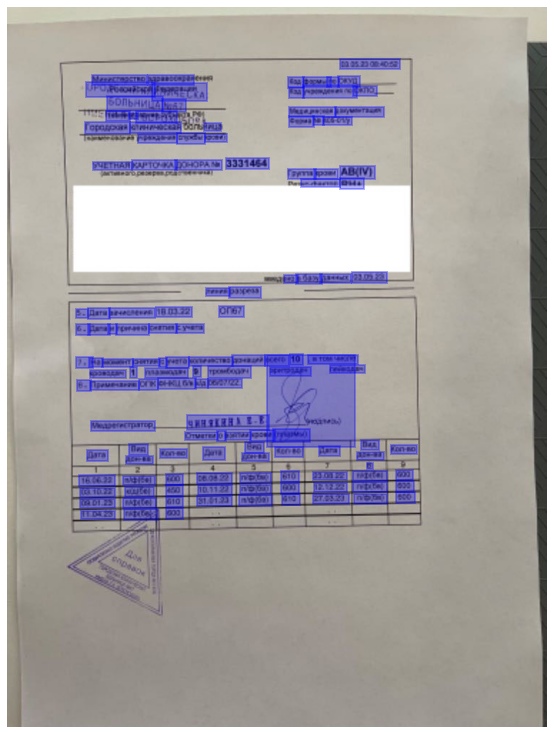

In [176]:
result.show(doc)

Даже без обработки снова есть правильно распознанные числа дат и те же **n** для плазмы.

In [186]:
result.pages[0].blocks[20]

Block(
  (lines): [
    Line(
      (words): [
        Word(value='16143', confidence=0.41),
        Word(value='mkisel', confidence=0.32),
        Word(value='40', confidence=0.45),
        Word(value='060499', confidence=0.41),
        Word(value='n'ob', confidence=0.48),
        Word(value='610', confidence=0.96),
        Word(value='230122', confidence=0.37),
        Word(value='rtte', confidence=0.29),
        Word(value='000', confidence=0.64),
      ]
    ),
    Line(
      (words): [
        Word(value='01022', confidence=0.65),
        Word(value='suLet', confidence=0.29),
        Word(value='450', confidence=0.95),
        Word(value='10.112)', confidence=0.49),
        Word(value='no', confidence=0.79),
        Word(value='60', confidence=0.49),
        Word(value='12.1222', confidence=0.93),
        Word(value='nbba', confidence=0.28),
        Word(value='000', confidence=0.76),
      ]
    ),
    Line(
      (words): [
        Word(value='D12', confidence=0.35),
        Wo

Если тромбоциты, то будет распознаваться **t**, если кровь, то **k**, если плазма - снова **n**. На остальных фотках также в большинстве случаев.

In [187]:
doc = DocumentFile.from_images('C:/Users/darve/Pet_projects/405/227414.jpg')

result = model(doc)

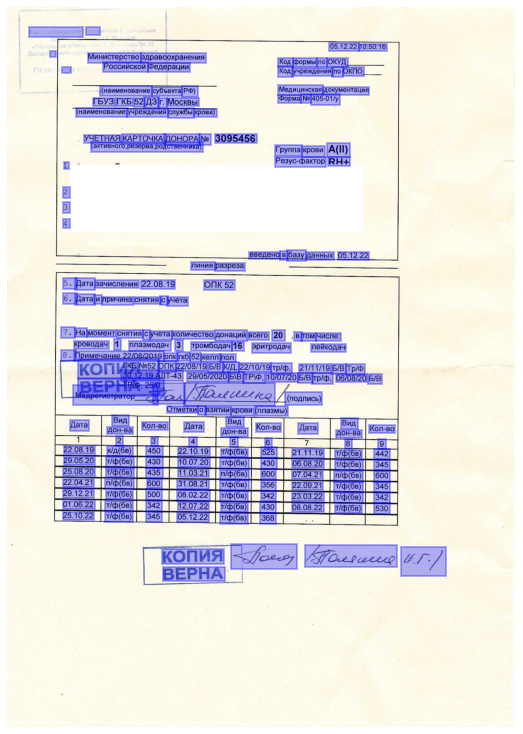

In [188]:
result.show(doc)

In [195]:
result.pages[0].blocks[24]

Block(
  (lines): [
    Line(
      (words): [
        Word(value='22.08.19', confidence=1.0),
        Word(value='K/A(6B)', confidence=0.94),
        Word(value='450', confidence=1.0),
        Word(value='22.10.19', confidence=1.0),
        Word(value='T/@p(6B)', confidence=0.33),
        Word(value='525', confidence=1.0),
        Word(value='21.11.19', confidence=1.0),
        Word(value='T/@p(6B)', confidence=0.34),
        Word(value='442', confidence=1.0),
      ]
    ),
    Line(
      (words): [
        Word(value='29.05.20', confidence=1.0),
        Word(value='T/dp(6B)', confidence=0.77),
        Word(value='430', confidence=1.0),
        Word(value='10.07.20', confidence=1.0),
        Word(value='T/dp(6B)', confidence=0.87),
        Word(value='430', confidence=0.98),
        Word(value='06.08.20', confidence=0.98),
        Word(value='T/dp(6B)', confidence=0.85),
        Word(value='345', confidence=1.0),
      ]
    ),
    Line(
      (words): [
        Word(value='25.08.20

Тут **ц**, которая судя по csv тоже кровь, распознается как **w**. В общем, меня радует, что от документа к документу есть общие паттерны, которые можно будет выделить в каком-то скрипте для одинакового распознавания. Естественно, не все ячейки опознаются правильно и метрика будет не 1.0, но хоть что-то достаточно стабильное

In [196]:
doc = DocumentFile.from_images('C:/Users/darve/Pet_projects/405/243478.jpg')

result = model(doc)

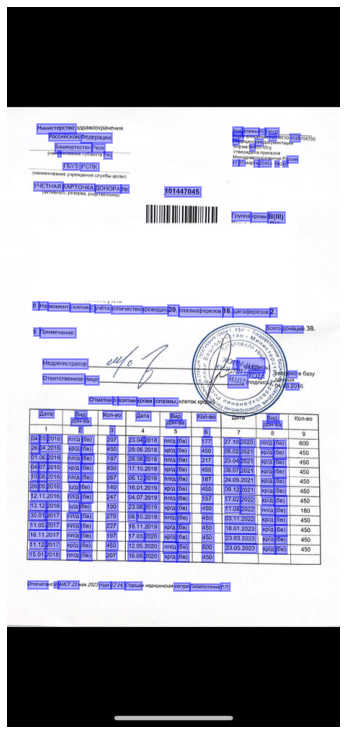

In [197]:
result.show(doc)

In [205]:
result.pages[0].blocks[20]

Block(
  (lines): [
    Line(
      (words): [
        Word(value='04', confidence=0.48),
        Word(value='03', confidence=0.89),
        Word(value='2016', confidence=0.96),
        Word(value='nna', confidence=0.67),
        Word(value='(60)', confidence=0.47),
      ]
    ),
    Line(
      (words): [
        Word(value='26.', confidence=0.85),
        Word(value='04.2016', confidence=1.0),
        Word(value='PA', confidence=0.64),
        Word(value='(Gn)', confidence=0.5),
      ]
    ),
    Line(
      (words): [
        Word(value='01.06.', confidence=0.99),
        Word(value='2016', confidence=0.88),
        Word(value='na', confidence=0.48),
        Word(value='(6o)', confidence=0.35),
      ]
    ),
    Line(
      (words): [
        Word(value='04.', confidence=0.57),
        Word(value='07.', confidence=0.88),
        Word(value='2016', confidence=0.96),
        Word(value='pA', confidence=0.48),
        Word(value='(Go)', confidence=0.47),
      ]
    ),
    Line(
   